## Predicting Employees That Are Likely To leave The Company

Hiring and retaining employees are very complex tasks and require alot of capital,time and skill.Small companies spend 40% of their time performing task that do not generate revenue such as hiring.Companies spend 15%-20% of their employees salary on hiring new employees.

An average company loses anywhere between 1% and 2.5% of their total revenue on the time it takes to bring a new hire up to speed”.

Hiring a new employee costs an average of $7645 (0-500 corporation).

It takes 52 days on average to fill a position.

## Problem Statement
* The HR team collected extensive data on their employees and approached you to develop a model that could predict which employees are more likely to quit. 
The team provided you with an extensive data, here's a sample of the dataset: 
* JobInvolvement
* Education
* JobSatisfaction
* PerformanceRating
* RelationshipSatisfaction
* WorkLifeBalance

## import Libraries

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder,StandardScaler

## load Data

In [202]:
emp_df = pd.read_csv('1.2 Human_Resources.csv')
emp_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [203]:
# info

emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [204]:
emp_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [205]:
# replacing objects in attrition ,overtime and over 18 with integers

emp_df['Attrition'] = emp_df['Attrition'].map({'Yes' : 1,
                       'No' : 0})

emp_df['OverTime'] = emp_df['OverTime'].map({'Yes' : 1,
                       'No' : 0})

emp_df['Over18'] = emp_df['Over18'].map({'Y' : 1,
                       'N' : 0})

In [206]:
emp_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [207]:
# missing values
emp_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

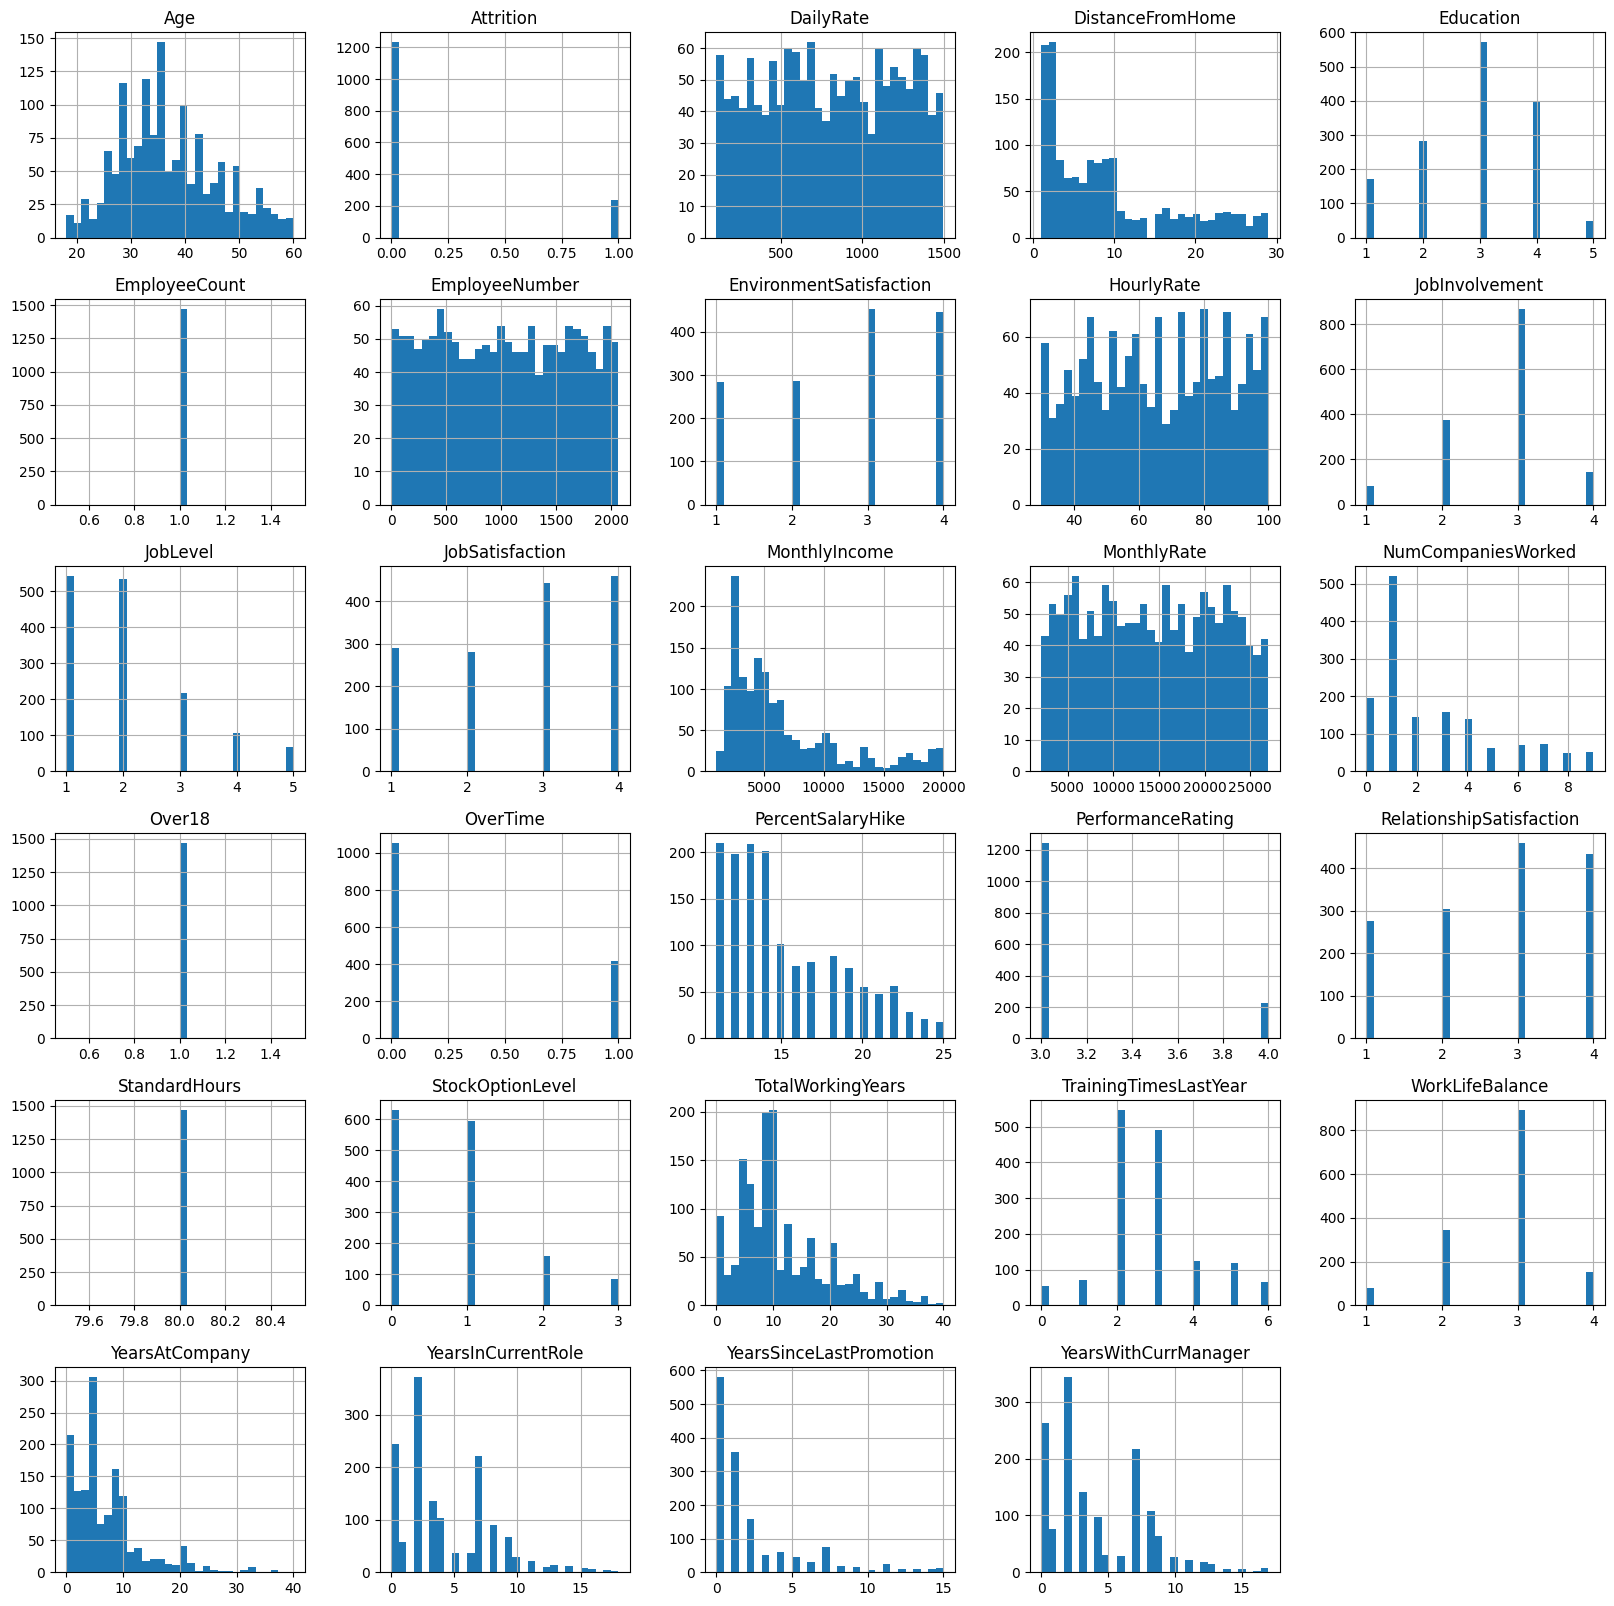

In [208]:
emp_df.hist(bins=30,figsize=(20,20));

In [209]:
# dropping over18,standardhours,employeecount,employeenumber because they make no sense and add nothing to the data

emp_df.drop(['Over18','StandardHours','EmployeeCount','EmployeeNumber'],axis = 1,inplace = True)
emp_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [210]:
# creating dataframe for employees that left and stayed

left_df = emp_df[emp_df['Attrition'] == 1]
stayed_df = emp_df[emp_df['Attrition'] == 0]

In [211]:
print(f'Total number of employees is : {len(emp_df)}')
print('==================================================')
print(f'Number of employees that left the company : {len(left_df)}')
print('=====================================================')
print(f'percentage of employes that left : {round(len(left_df)/len(emp_df) * 100,2)}')
print('========================================================')
print(f'Number of employees that stayed : {len(stayed_df)}')
print('==========================================================')
print(f'percentage of employees that stayed : {round(len(stayed_df)/len(emp_df) * 100,2)}')

Total number of employees is : 1470
Number of employees that left the company : 237
percentage of employes that left : 16.12
Number of employees that stayed : 1233
percentage of employees that stayed : 83.88


* The dataset is an imbalanced one

In [212]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [213]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


#### observation :

* Let's compare the mean and std of the employees who stayed and left 
* age: mean age of the employees who stayed is higher compared to who left
* DailyRate: Rate of employees who stayed is higher
* DistanceFromHome: Employees who stayed work closer to home 
* EnvironmentSatisfaction & JobSatisfaction: Employees who stayed are generally more satisifed with their jobs
* StockOptionLeve: Employees who stayed tend to have higher stock option level

C:\Users\user\AppData\Local\Temp\ipykernel_10504\2550562823.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  emp_corr = emp_df.corr()


<AxesSubplot: >

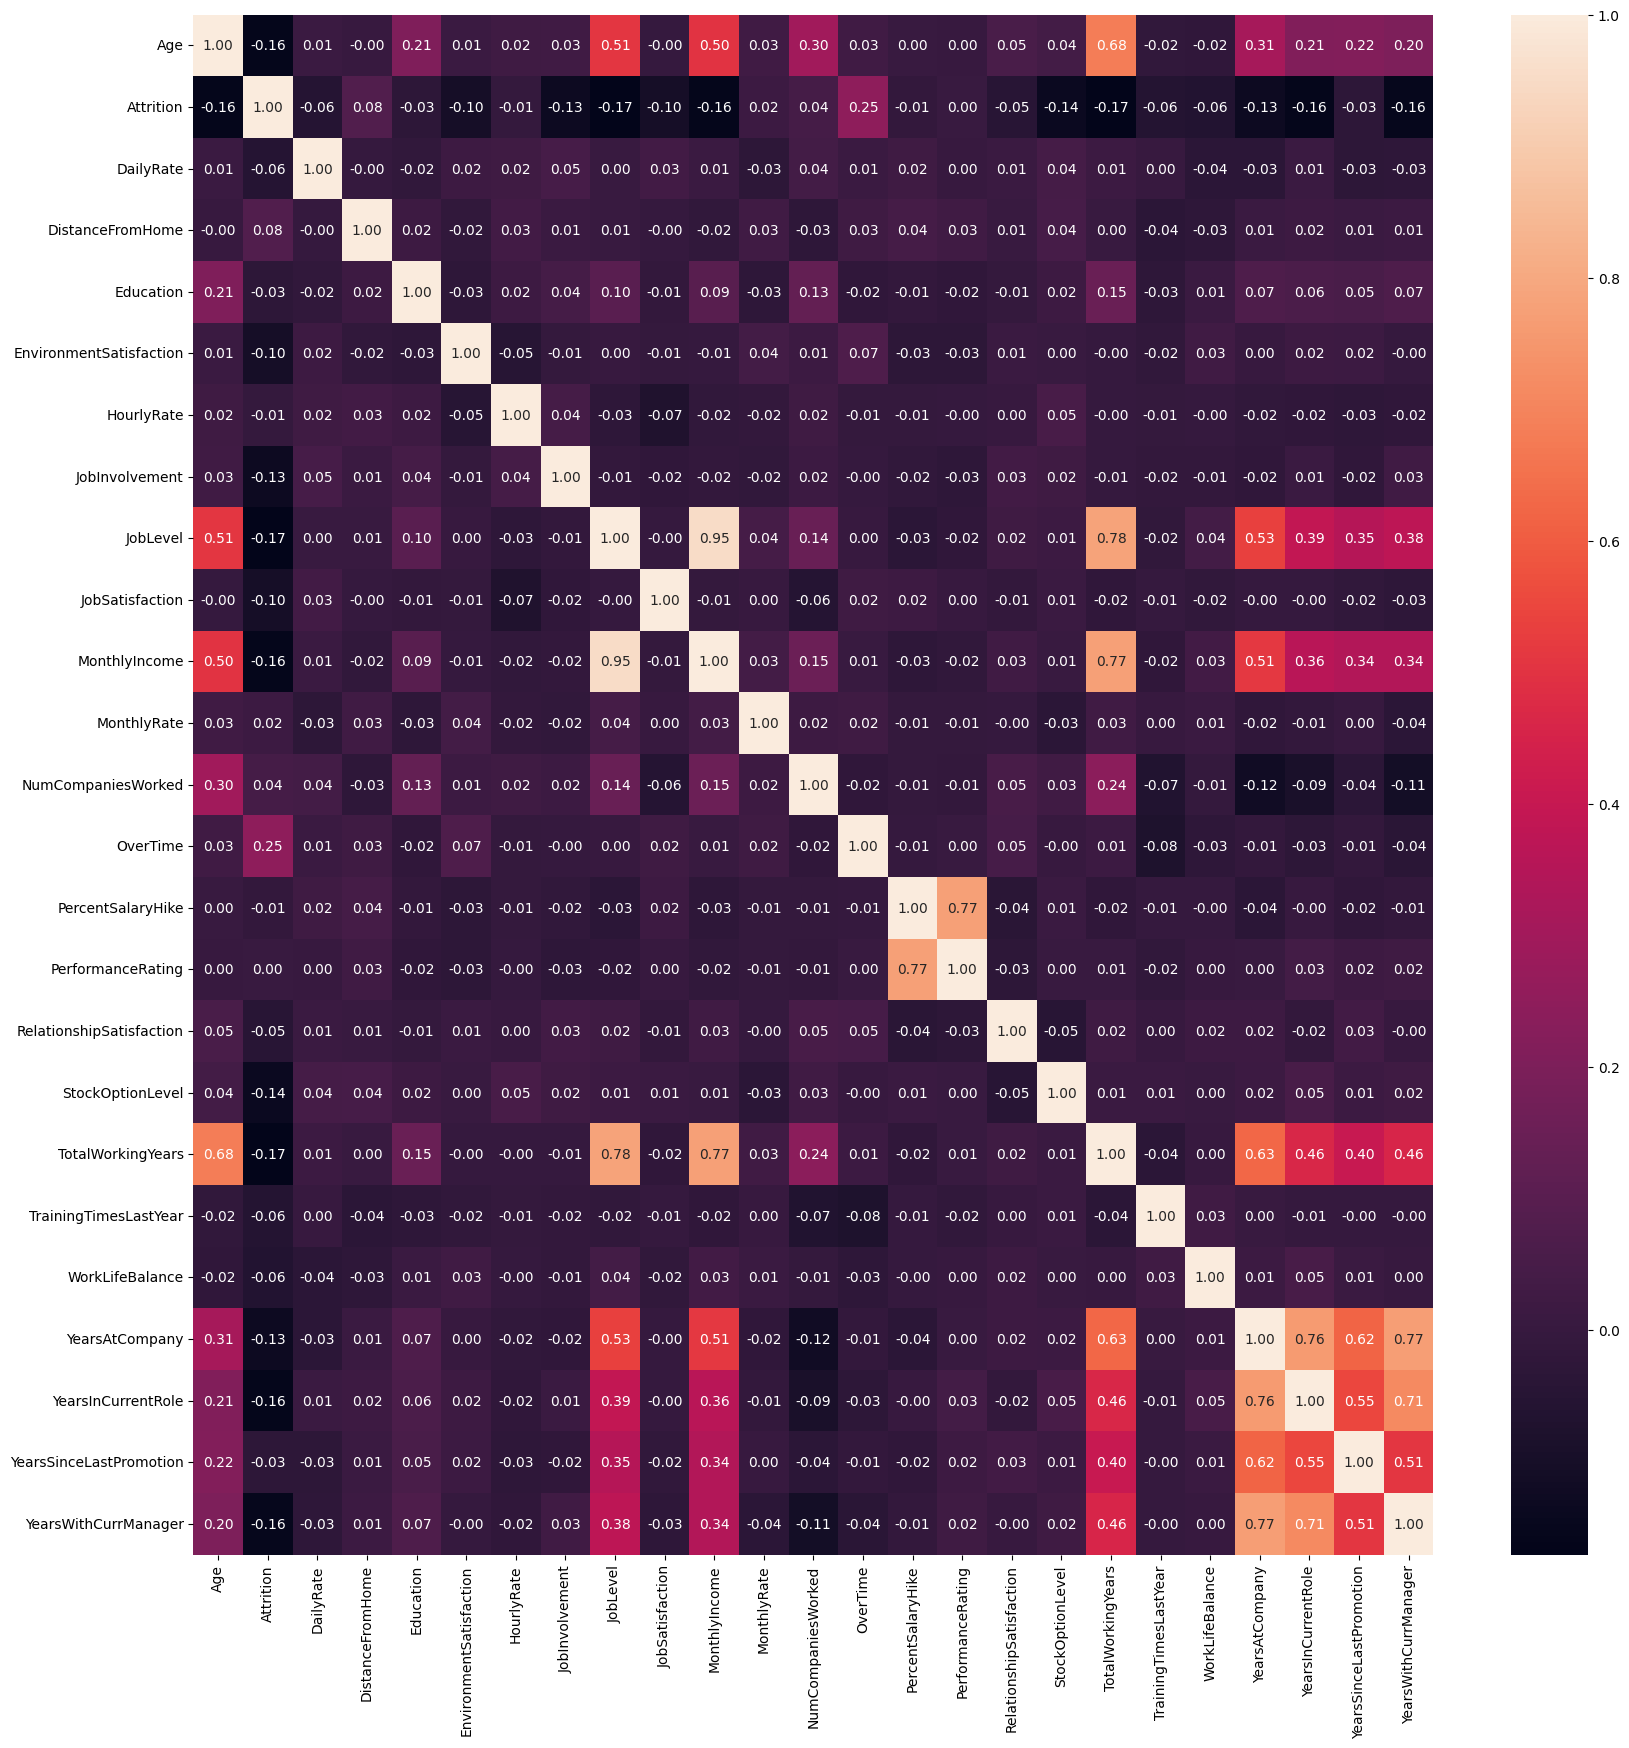

In [214]:
# correlation

emp_corr = emp_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(emp_corr,annot = True,fmt = '.2F')

## observation:
* Job level is strongly correlated with total working hours
* Monthly income is strongly correlated with Job level
* Monthly income is strongly correlated with total working hours
* Age is stongly correlated with monthly income

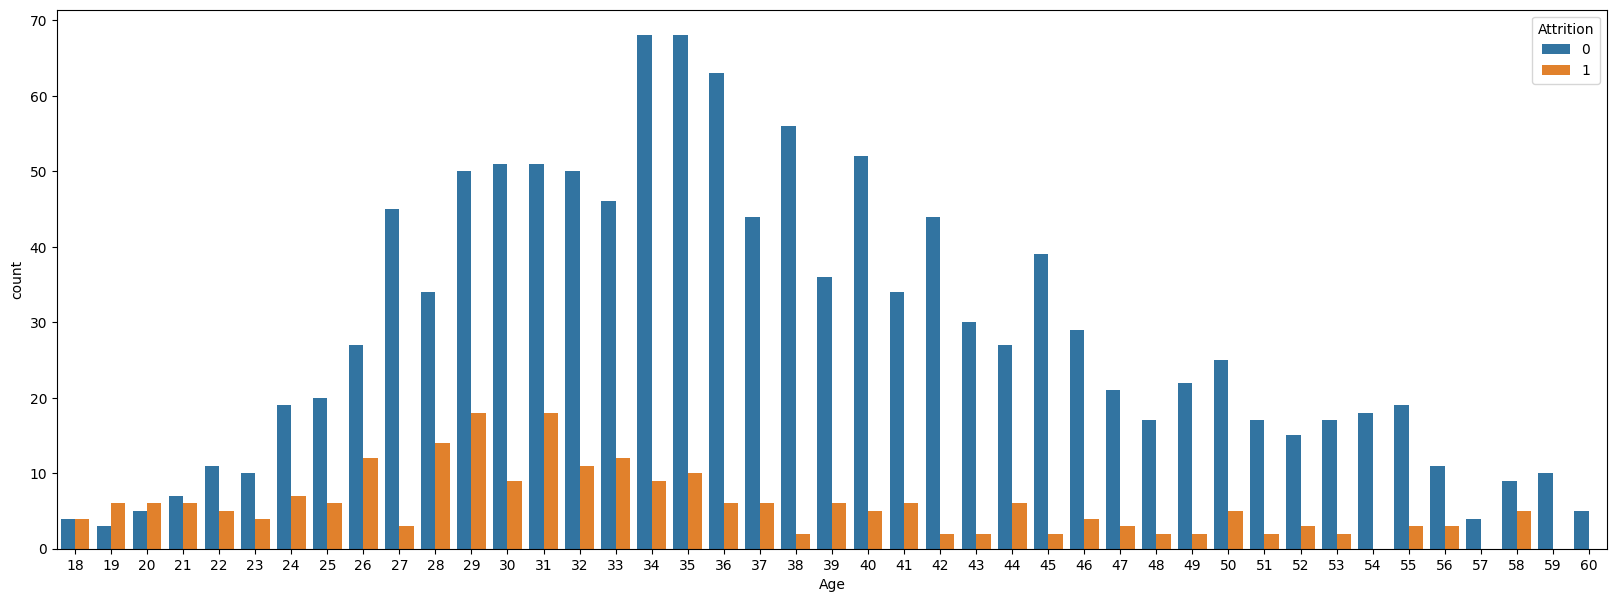

In [215]:
# a plot of age and attrition

plt.figure(figsize = (20,7))
sns.countplot(x='Age',hue = 'Attrition',data = emp_df);

## observation :

* As the employee tends to be younger, there are higher chances of them leaving the company

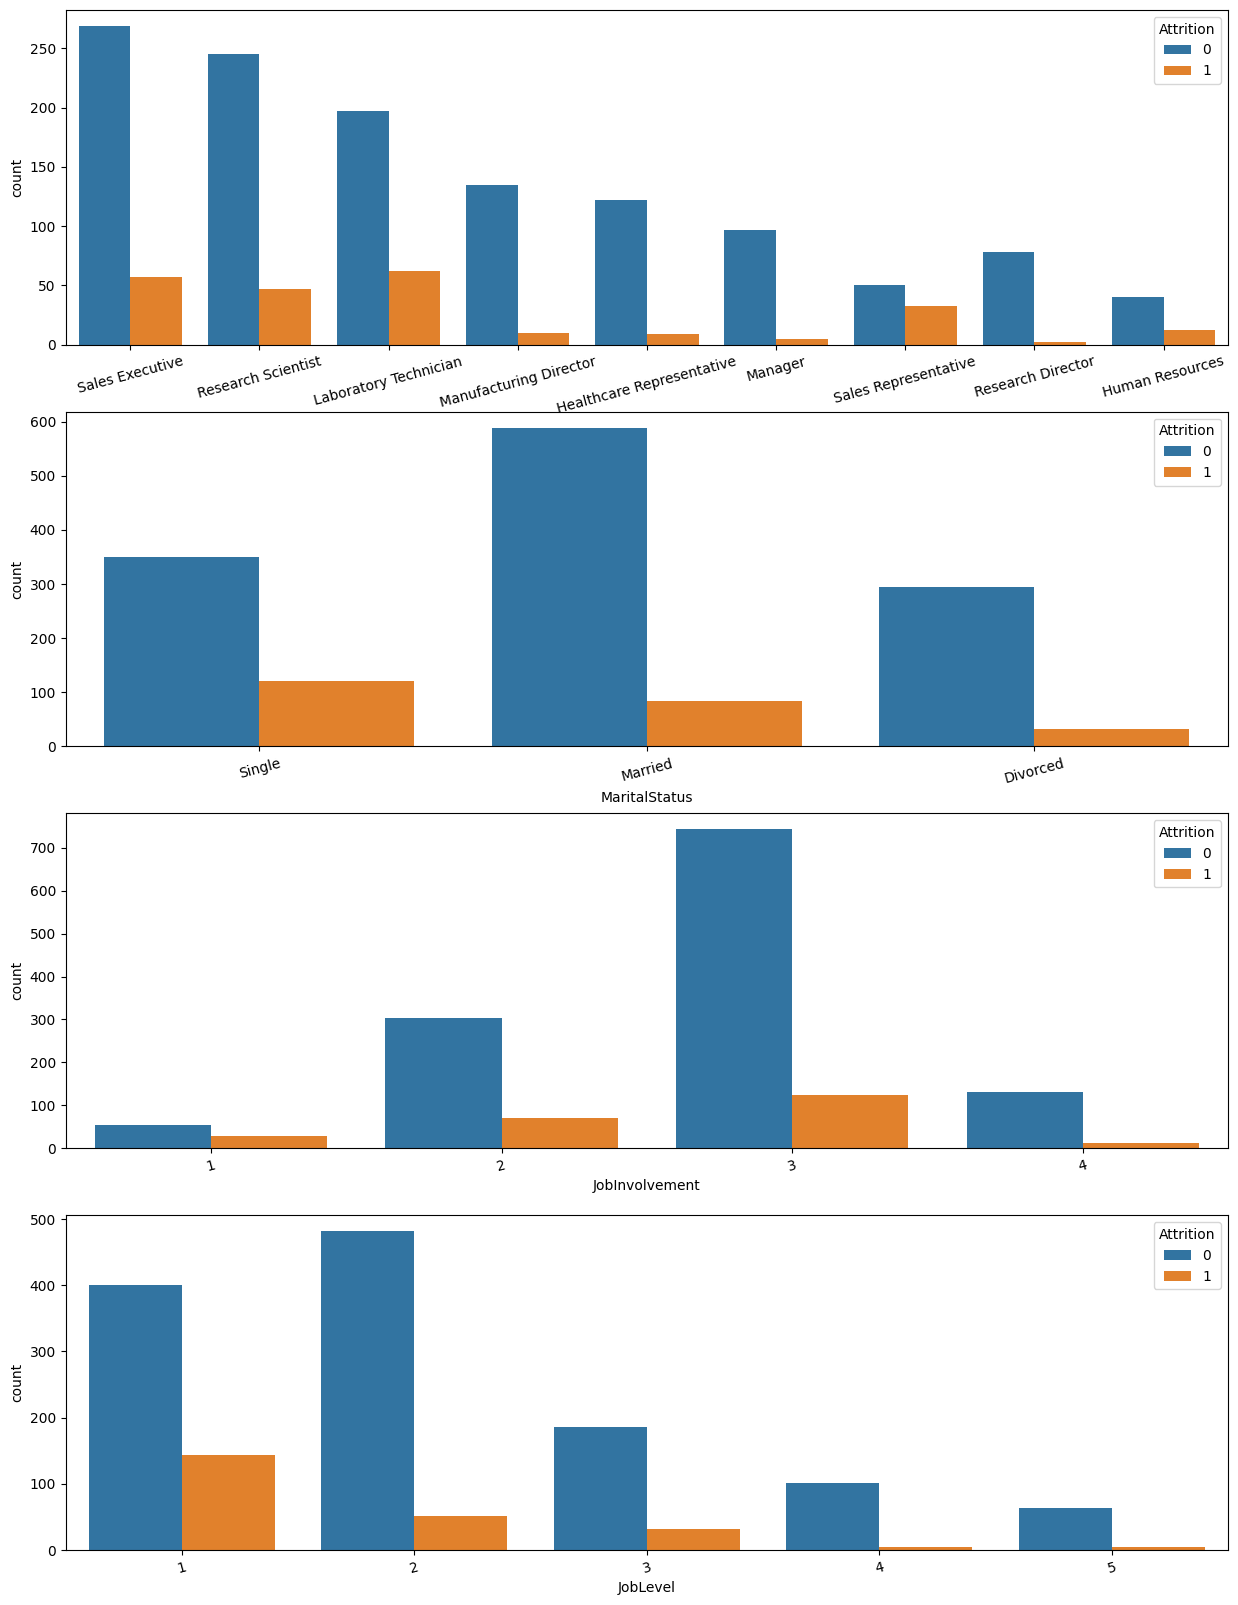

In [216]:
feature = ['JobRole','MaritalStatus','JobInvolvement','JobLevel']
plt.figure(figsize = (15,20))
for i in range(len(feature)) :
    plt.subplot(4,1,i+1)
    sns.countplot(x = feature[i],hue='Attrition',data = emp_df)
    plt.xticks(rotation = 15)

C:\Users\user\AppData\Local\Temp\ipykernel_10504\3021464188.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x= left_df['DistanceFromHome'],color = 'blue',shade = True,data = left_df,label = 'employees who left')
C:\Users\user\AppData\Local\Temp\ipykernel_10504\3021464188.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = stayed_df['DistanceFromHome'],color = 'orange',shade = True,data = stayed_df,label = 'employees who stayed')


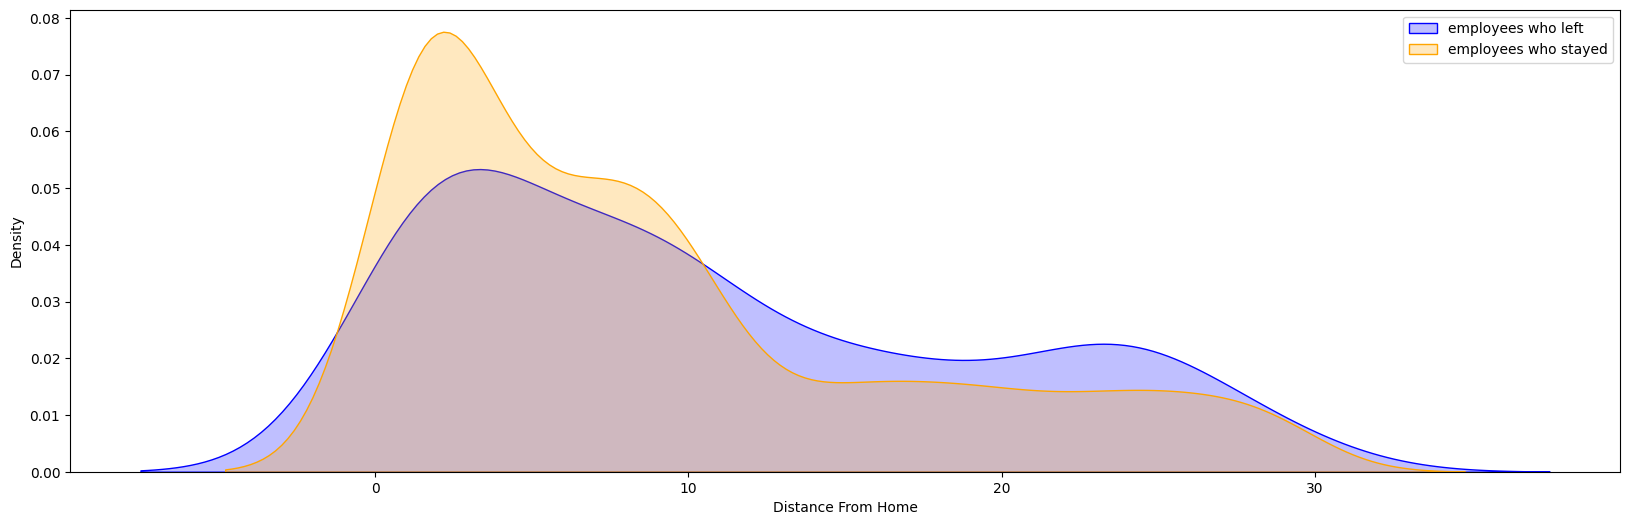

In [217]:
# kde plot for distancefrom home

plt.figure(figsize = (20,6))
sns.kdeplot(x= left_df['DistanceFromHome'],color = 'blue',shade = True,data = left_df,label = 'employees who left')
sns.kdeplot(x = stayed_df['DistanceFromHome'],color = 'orange',shade = True,data = stayed_df,label = 'employees who stayed')

plt.xlabel('Distance From Home')
plt.legend()

# Observation :
* as the distance increases, the emloyees tends to leave 

C:\Users\user\AppData\Local\Temp\ipykernel_10504\2664017364.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=left_df['YearsWithCurrManager'],label = 'employees who left',shade = True,data = left_df)
C:\Users\user\AppData\Local\Temp\ipykernel_10504\2664017364.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=stayed_df['YearsWithCurrManager'],label = 'employees who stayed',shade = True,data = stayed_df)


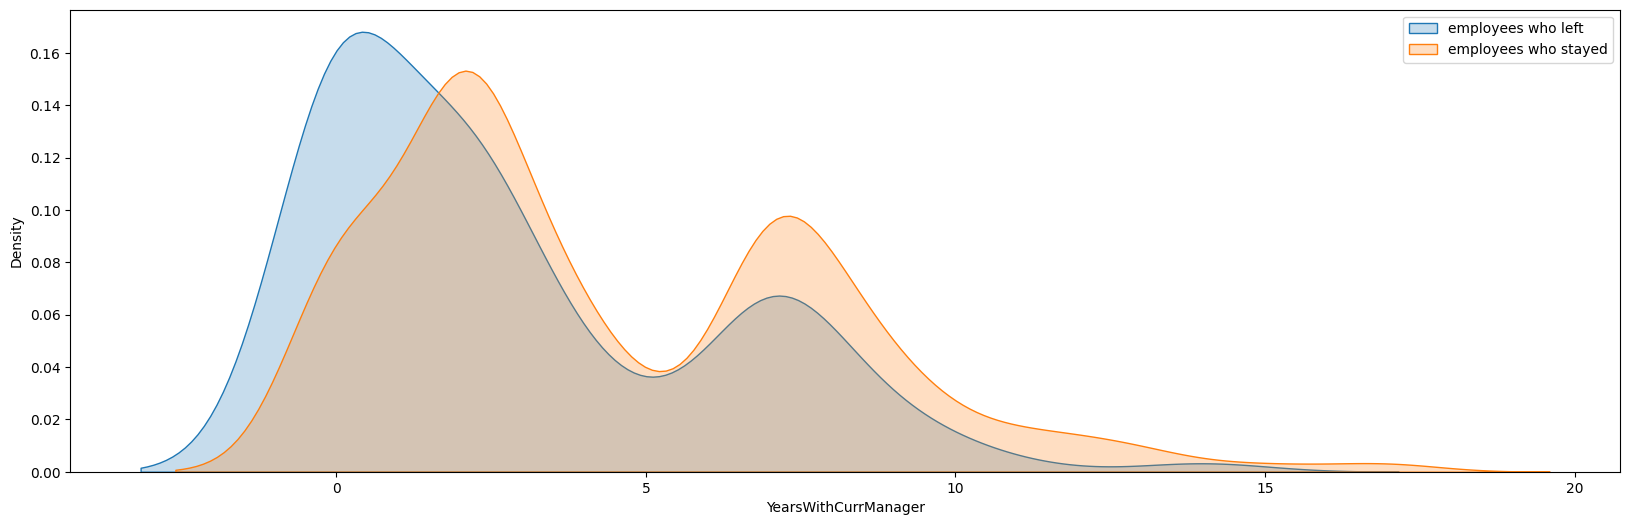

In [218]:
# kdeplot for workwithmanager and total wowrking years
plt.figure(figsize = (20,6))
sns.kdeplot(x=left_df['YearsWithCurrManager'],label = 'employees who left',shade = True,data = left_df)
sns.kdeplot(x=stayed_df['YearsWithCurrManager'],label = 'employees who stayed',shade = True,data = stayed_df)
plt.legend();

## observation :
* employees who worked shorter period with current manager tends to leave

C:\Users\user\AppData\Local\Temp\ipykernel_10504\1223320990.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=left_df['TotalWorkingYears'],label = 'employees who left',shade = True,data = left_df)
C:\Users\user\AppData\Local\Temp\ipykernel_10504\1223320990.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=stayed_df['TotalWorkingYears'],label = 'employees who stayed',shade = True,data = stayed_df)


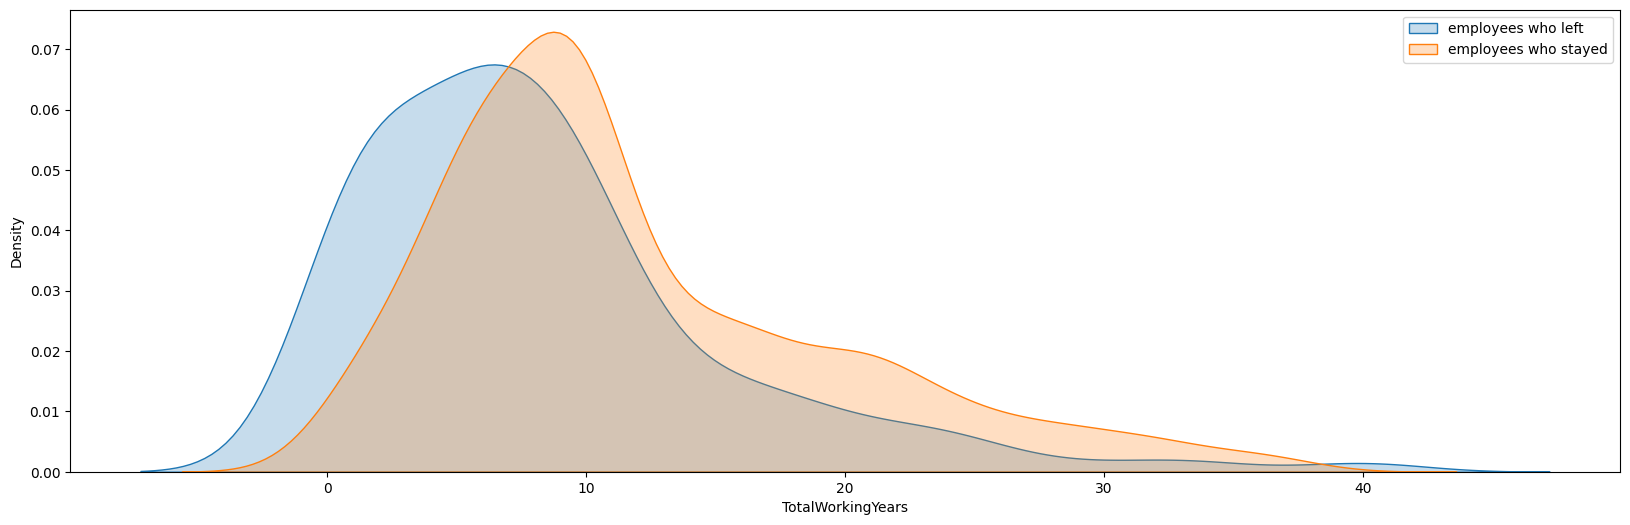

In [219]:
plt.figure(figsize = (20,6))
sns.kdeplot(x=left_df['TotalWorkingYears'],label = 'employees who left',shade = True,data = left_df)
sns.kdeplot(x=stayed_df['TotalWorkingYears'],label = 'employees who stayed',shade = True,data = stayed_df)
plt.legend();

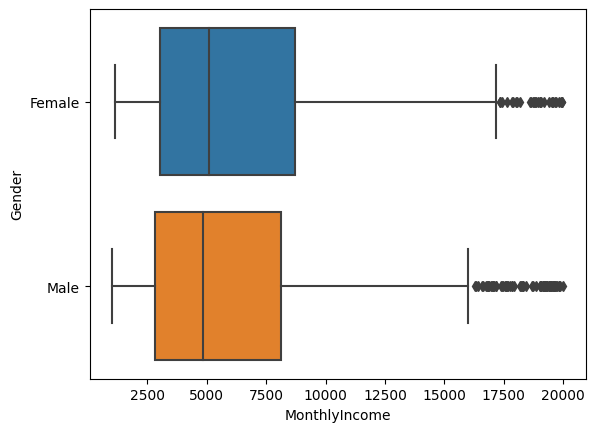

In [220]:
# boxplot for gender against monthly income
sns.boxplot(x='MonthlyIncome',y='Gender',data = emp_df);

## Observation :
* The average monthly salary for both gender show no significant differences which is a good thing

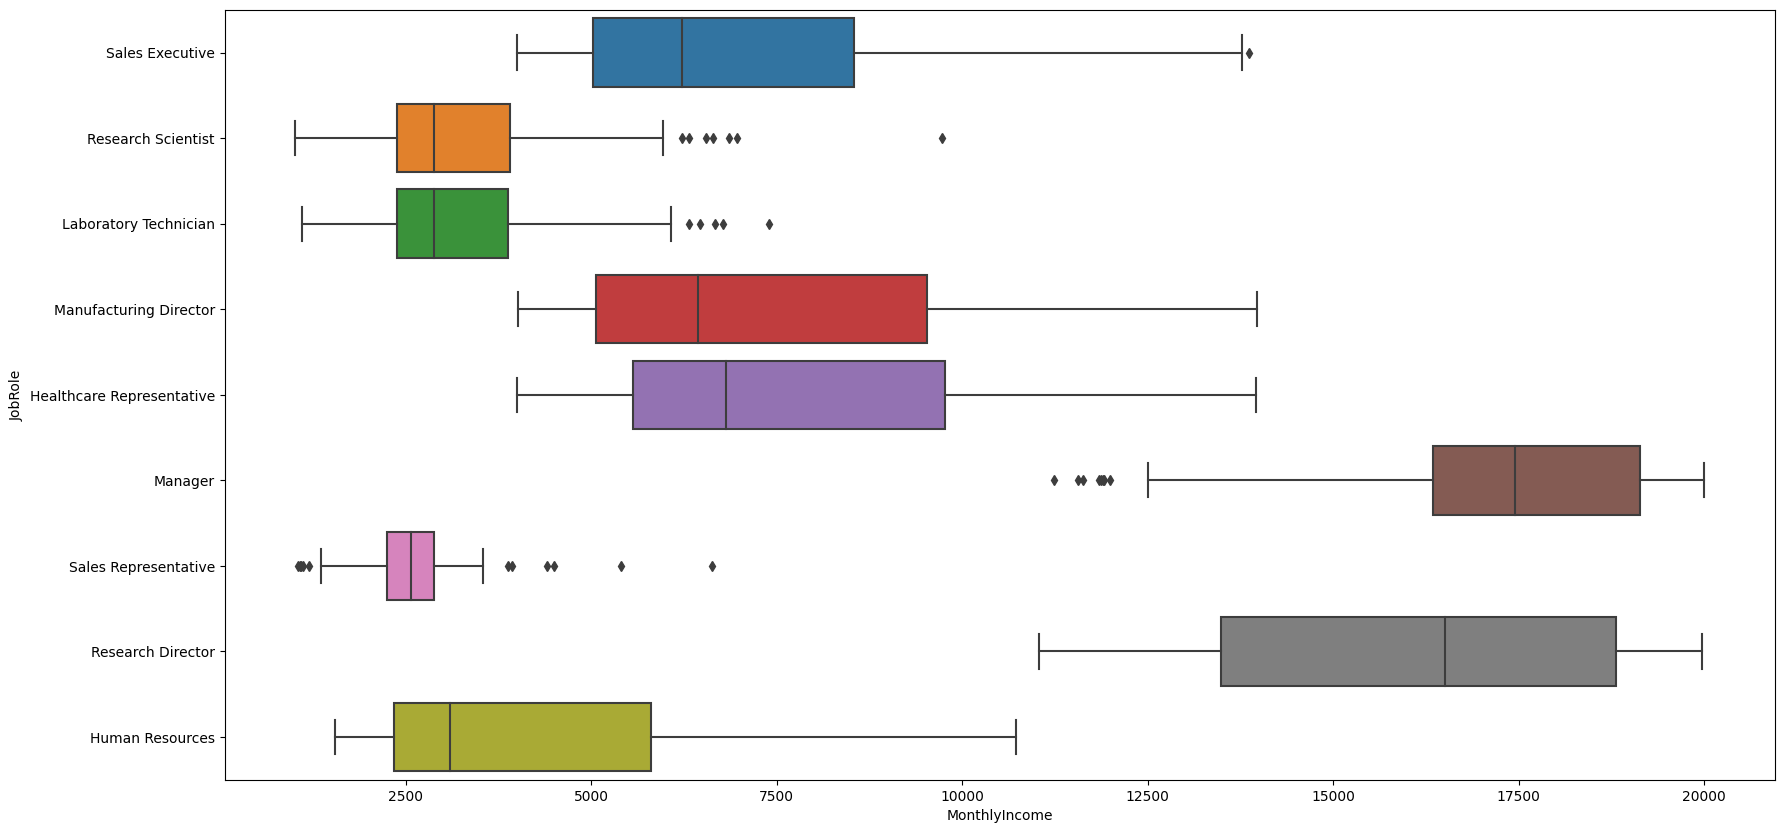

In [221]:
plt.figure(figsize = (20,10))
sns.boxplot(x='MonthlyIncome',y='JobRole',data = emp_df);

## Data Cleaning

In [222]:
emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [223]:
cat_feature = []
for col in emp_df.columns :
    if not pd.api.types.is_numeric_dtype(emp_df[col]) :
        cat_feature.append(col)
cat_feature = emp_df[cat_feature]
# instantiating one hot encoder
one_hot = OneHotEncoder()
cat_feature = one_hot.fit_transform(cat_feature).toarray()

In [224]:
cat_feature = pd.DataFrame(cat_feature)
cat_feature

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [225]:
## numeric columns
num_feature = []
for col in emp_df.columns :
    if  pd.api.types.is_numeric_dtype(emp_df[col]) and col != 'Attrition' :
        num_feature.append(col)
num_feature = emp_df[num_feature]

In [226]:
num_feature

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [227]:
x = pd.concat([cat_feature,num_feature],axis = 1)
x

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


In [228]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

C:\Users\user\miniconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\miniconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[-0.33709993, -0.48185865,  0.63984058, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [-0.33709993,  2.07529738, -1.5628893 , ...,  0.76499762,
        -0.36871529,  0.80654148],
       [-0.33709993, -0.48185865,  0.63984058, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-0.33709993, -0.48185865,  0.63984058, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [-0.33709993,  2.07529738, -1.5628893 , ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.33709993, -0.48185865,  0.63984058, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [229]:
y = emp_df['Attrition']

In [230]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [231]:
# Handling imbalance data
from imblearn.over_sampling import RandomOverSampler

In [234]:
ros = RandomOverSampler(sampling_strategy = 0.8)
x_over,y_over = ros.fit_resample(x,y)

In [240]:
x_over.shape,y_over.shape

((2219, 50), (2219,))

## Training A Logistic Regression model

In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix

In [242]:
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.2)

In [243]:
x_train.shape,x_test.shape

((1775, 50), (444, 50))

In [244]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [245]:
print(f'training score {lr.score(x_train,y_train)}')
print('============================================')
print(f'test score : {lr.score(x_test,y_test)}')

training score 0.7797183098591549
test score : 0.7882882882882883


In [246]:
y_preds = lr.predict(x_test)

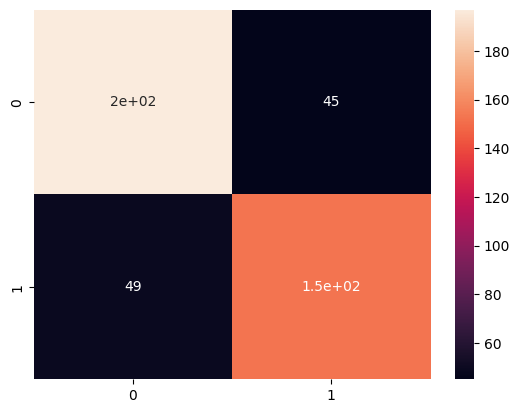

In [247]:
#confusion matrix
conf = confusion_matrix(y_test,y_preds)
sns.heatmap(conf,annot = True);

In [248]:
# classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       242
           1       0.77      0.76      0.77       202

    accuracy                           0.79       444
   macro avg       0.79      0.79      0.79       444
weighted avg       0.79      0.79      0.79       444



## Randomforest

In [249]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [250]:
print(f'training score {rf.score(x_train,y_train)}')
print('============================================')
print(f'test score : {rf.score(x_test,y_test)}')

training score 1.0
test score : 0.9752252252252253


In [251]:
y_preds = rf.predict(x_test)

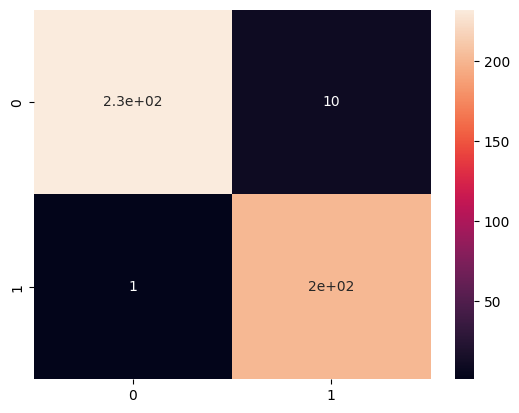

In [252]:
#confusion matrix
conf = confusion_matrix(y_test,y_preds)
sns.heatmap(conf,annot = True);

In [253]:
# classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       242
           1       0.95      1.00      0.97       202

    accuracy                           0.98       444
   macro avg       0.97      0.98      0.98       444
weighted avg       0.98      0.98      0.98       444



# ANN

In [262]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500 , activation = 'relu',input_shape =(50,)))
model.add(tf.keras.layers.Dense(units = 500 , activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 500 , activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1 , activation = 'sigmoid'))

In [263]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               25500     
                                                                 
 dense_5 (Dense)             (None, 500)               250500    
                                                                 
 dense_6 (Dense)             (None, 500)               250500    
                                                                 
 dense_7 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [264]:
model.compile(loss = 'binary_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])

In [265]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                              patience = 4,verbose = 1)

In [266]:
model.fit(x_train,y_train,callbacks = early_stopping,validation_data = (x_test,y_test),epochs = 500,batch_size = 32)

Epoch 1/500
56/56 [==============================] - 3s 23ms/step - loss: 0.4910 - accuracy: 0.7623 - val_loss: 0.3621 - val_accuracy: 0.8626
Epoch 2/500
56/56 [==============================] - 1s 18ms/step - loss: 0.2972 - accuracy: 0.8811 - val_loss: 0.2500 - val_accuracy: 0.8874
Epoch 3/500
56/56 [==============================] - 1s 18ms/step - loss: 0.1687 - accuracy: 0.9442 - val_loss: 0.2089 - val_accuracy: 0.9257
Epoch 4/500
56/56 [==============================] - 1s 19ms/step - loss: 0.0846 - accuracy: 0.9741 - val_loss: 0.1792 - val_accuracy: 0.9234
Epoch 5/500
56/56 [==============================] - 1s 18ms/step - loss: 0.0448 - accuracy: 0.9820 - val_loss: 0.1565 - val_accuracy: 0.9527
Epoch 6/500
56/56 [==============================] - 1s 18ms/step - loss: 0.0185 - accuracy: 0.9938 - val_loss: 0.1216 - val_accuracy: 0.9685
Epoch 7/500
56/56 [==============================] - 1s 18ms/step - loss: 0.0127 - accuracy: 0.9955 - val_loss: 0.2479 - val_accuracy: 0.9347
Epoch 

In [267]:
y_preds = model.predict(x_test)
y_preds = (y_preds>0.5)

14/14 [==============================] - 0s 3ms/step


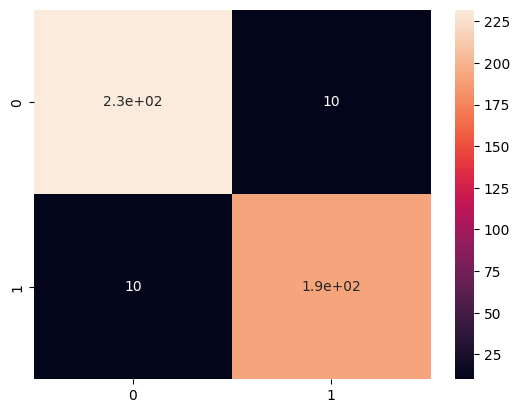

In [269]:
#confusion matrix
conf = confusion_matrix(y_test,y_preds)
sns.heatmap(conf,annot = True);

In [270]:
# classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       242
           1       0.95      0.95      0.95       202

    accuracy                           0.95       444
   macro avg       0.95      0.95      0.95       444
weighted avg       0.95      0.95      0.95       444



## conclusion :

* The `RandomForestClassifier` performs better than the rest models, so base model is the `RandomforestClassifier`

In [272]:
## saving model

from joblib import dump

dump(rf,filename = 'HR_randomforestmodel.joblib')

['HR_randomforestmodel.joblib']